## Import Libraries

In [8]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load Cleaned Data

In [2]:
# Load data
df = pd.read_csv("../data/bank_cleaned.csv")
data = df.copy()
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Separate Features and Target

In [3]:
# Features
X = data.drop(columns=['deposit'])

# Target
y = data['deposit']

# Standardize features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Fit Lasso with Cross-Validation

In [4]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


## Examine Feature Coefficients

In [5]:
coef = pd.Series(lasso.coef_, index=X.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)
coef_sorted

duration               0.232100
poutcome_success       0.107023
month_may             -0.087333
housing               -0.059422
month_jul             -0.055090
month_aug             -0.053643
month_nov             -0.044737
month_jun             -0.042721
month_mar              0.039279
education_tertiary     0.037484
month_jan             -0.036482
campaign              -0.026620
loan                  -0.023801
month_oct              0.022415
job_student            0.021245
month_feb             -0.017343
job_blue-collar       -0.017285
previous               0.017213
job_management        -0.016536
education_secondary    0.015938
job_retired            0.015406
poutcome_other         0.015176
month_sep              0.015052
month_dec              0.013078
job_self-employed     -0.013004
balance                0.012841
marital_married       -0.012522
job_services          -0.011137
job_housemaid         -0.010476
job_entrepreneur      -0.009919
day                   -0.008473
marital_

## Visualize Feature Importance

/var/folders/f3/2h5sb1nn649d3hmt5qj1f_vm0000gn/T/ipykernel_11635/2056307180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_sorted.values, y=coef_sorted.index, palette='coolwarm')


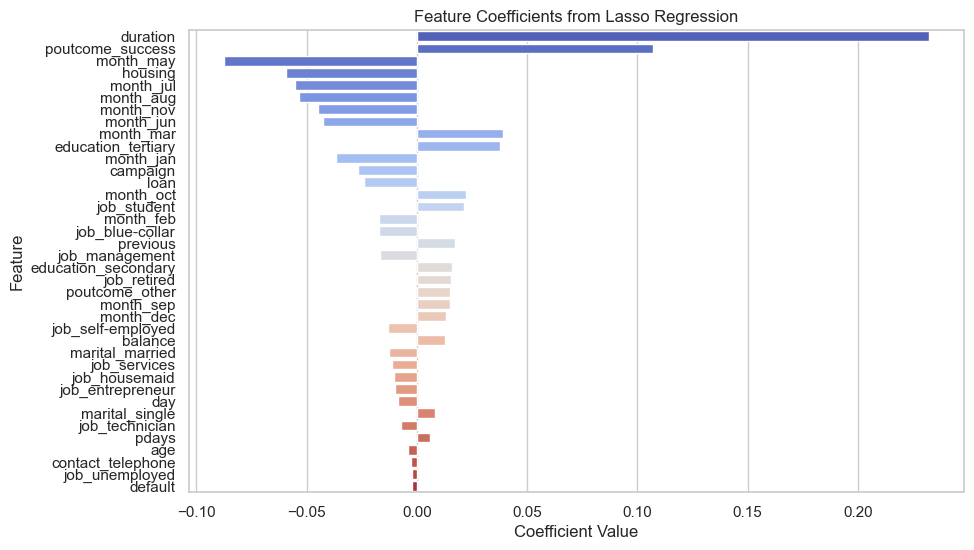

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=coef_sorted.values, y=coef_sorted.index, palette='coolwarm')
plt.title("Feature Coefficients from Lasso Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

## Select Non-Zero Features

In [7]:
selected_features = coef[coef != 0].index
print(f"Selected features ({len(selected_features)}): {list(selected_features)}")

# Reduce dataset to selected features
X_selected = X[selected_features]
X_selected.head()

Selected features (38): ['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success']


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Compare Model Performance

In [9]:
model = LogisticRegression(max_iter=1000, solver='liblinear')

# All features
scores_all = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy with all features: {scores_all.mean():.3f}")

# Lasso-selected features
scores_lasso = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
print(f"Accuracy with Lasso-selected features: {scores_lasso.mean():.3f}")

Accuracy with all features: 0.783
Accuracy with Lasso-selected features: 0.783
